In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import re,string
from datetime import datetime as dt
import seaborn as sns
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import random
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

In [3]:
final_rest_df= pd.read_csv('/content/drive/MyDrive/datasets/Dataset_latest.csv')

In [ ]:
final_rest_df.head(5)

,stars,American,Mexican,Italian,Japanese,Chinese,Thai,Mediterranean,French,Vietnamese,Greek,Indian,Korean,Hawaiian,African,Spanish,Middle Eastern,Other,age,review_count_16_19,review_normalized,pos,neg,neutral,pos_norm,neg_norm,neutral_norm,bi_goodfood_text,bi_goodloc_text,bi_bad_text,Delivery,RestaurantsPriceRange2,OutdoorSeating,HasTV,Touristy,Hipster,Romantic,Divey,Intimate,Trendy,Upscale,Classy,Casual,Alc_None_served,Alc_beer_and_wine,Alc_full_bar,open_breakfast,open_lunch,open_dinner,open_hours_meals,displayed_open_hours,is_crowded,is_chain,is_open,operation_years
0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,34,11.33,23,5,6,7.67,1.67,2.00,0,4,1,1,2,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,2,1,1,0,0,1
1,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,5,0.50,4,1,0,0.40,0.10,0.00,2,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3
2,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,74,14.80,53,14,7,10.60,2.80,1.40,6,3,2,1,2,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,3,1,1,0,1,0
3,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,216,14.40,163,33,20,10.87,2.20,1.33,30,34,12,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,2,1,1,0,1,0
4,4.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,14,3.50,13,1,0,3.25,0.25,0.00,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,3


Dropped age and operation years column as there was data leakage to target variable. And the normalized variables were dropped as the inuition for creating this variable considering the age parameter was not entirely justified. 

In [4]:
drop_cols= ['age', 'review_normalized', 'pos_norm', 'neg_norm', 'neutral_norm', 'operation_years']

In [5]:
df= final_rest_df.drop(drop_cols, axis=1)

In [ ]:
df.head(3)

,stars,American,Mexican,Italian,Japanese,Chinese,Thai,Mediterranean,French,Vietnamese,Greek,Indian,Korean,Hawaiian,African,Spanish,Middle Eastern,Other,review_count_16_19,pos,neg,neutral,bi_goodfood_text,bi_goodloc_text,bi_bad_text,Delivery,RestaurantsPriceRange2,OutdoorSeating,HasTV,Touristy,Hipster,Romantic,Divey,Intimate,Trendy,Upscale,Classy,Casual,Alc_None_served,Alc_beer_and_wine,Alc_full_bar,open_breakfast,open_lunch,open_dinner,open_hours_meals,displayed_open_hours,is_crowded,is_chain,is_open
0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,34,23,5,6,0,4,1,1,2,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,2,1,1,0,0
1,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,4,1,0,2,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,53,14,7,6,3,2,1,2,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,3,1,1,0,1


### Correlation

In [ ]:
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

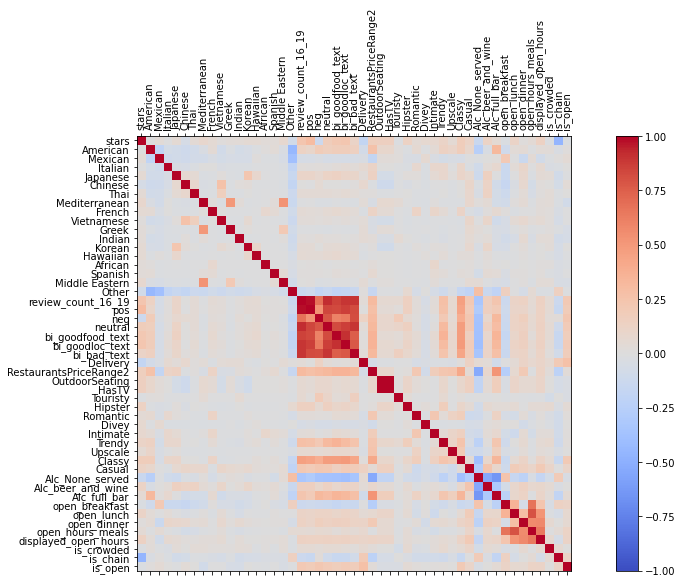

In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [6]:
cols_drop= ['pos', 'neg', 'neutral', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours'] #review_count_16_19 # 
df_new = df.drop(cols_drop, axis=1)

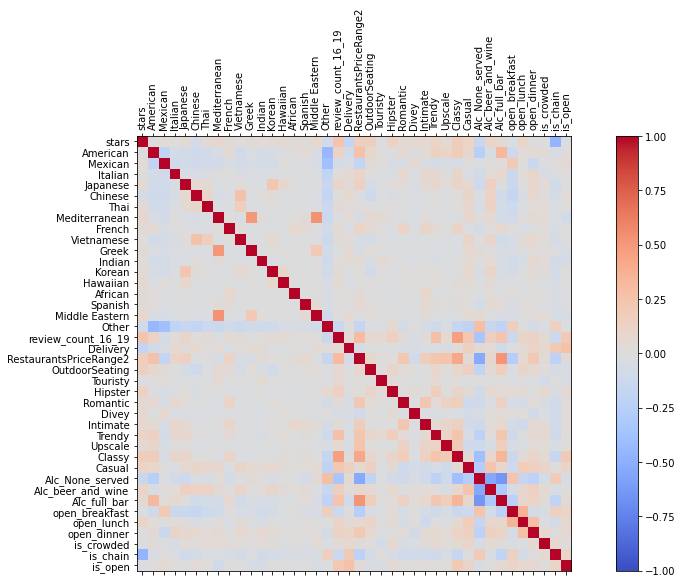

In [ ]:
corr = df_new.corr()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_new.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_new.columns)
ax.set_yticklabels(df_new.columns)
plt.show()

#### Scaling

In [7]:
def scaling_func(x_train, x_test, category_cols):
    x_train_scale= x_train[num_feature]
    x_test_scale= x_test[num_feature]

    #filter categorical columns
    cat_train= x_train[category_cols]
    cat_test= x_test[category_cols]

    scaler = StandardScaler()
    train_trans= scaler.fit_transform(x_train_scale.values)
    test_trans= scaler.transform(x_test_scale)
    x_train_scale.iloc[:][:]= train_trans
    x_test_scale.iloc[:][:]= test_trans

    #Concat numerical scaled cols to category columns
    scale_train= pd.concat([x_train_scale, cat_train], axis=1, ignore_index=True)
    scale_test= pd.concat([x_test_scale, cat_test], axis=1, ignore_index=True)

    return scale_train.values, scale_test.values

#### With dropped co-related features:

In [8]:
#scale only numerical columns:

num_feature= ['stars', 'review_count_16_19', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
print(category_cols)

features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)

['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle Eastern', 'Other', 'Delivery', 'OutdoorSeating', 'Touristy', 'Hipster', 'Romantic', 'Divey', 'Intimate', 'Trendy', 'Upscale', 'Classy', 'Casual', 'Alc_None_served', 'Alc_beer_and_wine', 'Alc_full_bar', 'open_breakfast', 'open_lunch', 'open_dinner', 'is_crowded', 'is_chain']


#### Using F1-score:

In [57]:
def run_cross_validation_f1_score(X, Y, acc_list, plots_enabled=False, return_model= False, predict_test=False, x_test=None, y_test=None):
    skf = StratifiedKFold(n_splits = 5, shuffle = True) 
    ctr=1
    test_f1=[]
    for train_index, val_index in skf.split(X, Y):

        print('Running for K= ', ctr)
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        #print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)
        model, history= model_train(X_train, Y_train, X_val, Y_val, 100, 10, 64, 'tanh')
    
        ######plots
        if plots_enabled:
            fig, axs= plt.subplots(1,1)
            fig.suptitle(f"For K= {ctr}")
            axs.plot(history.history['loss'], label='train')
            axs.plot(history.history['val_loss'], label='validation')
            axs.title.set_text('Loss Plot')
            axs.legend()
            plt.show()
        
        ## predict probabilities for test set
        yhat_probs = model.predict(X_val, verbose=0)
        yhat_probs = yhat_probs[:, 0]
        yhat_classes = 1*(yhat_probs > 0.5)       
        # f1: 2 tp / (2 tp + fp + fn)
        f1 = f1_score(Y_val, yhat_classes)
        acc_list.append(f1) 

        if predict_test:
            yhat_probs = model.predict(x_test, verbose=0)
            yhat_probs = yhat_probs[:, 0]
            yhat_classes = 1*(yhat_probs > 0.5)       
            # f1: 2 tp / (2 tp + fp + fn)
            f1 = f1_score(y_test, yhat_classes)
            test_f1.append(f1)

        ctr+=1

        #if return_model:
        #    print('ff')
        #    matrix = confusion_matrix(Y_val, yhat_classes)
        #    sns.heatmap(matrix, annot=True)
        #    plt.show()
    if return_model:
        return model,history, acc_list, test_f1
    return acc_list

Considering 'total count' and dropping 'pos' 'neg' 'neutral':

In [10]:
cols_drop= ['pos', 'neg', 'neutral', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

In [11]:
#scale only numerical columns:
num_feature= ['stars', 'review_count_16_19', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
print(category_cols)


features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)

['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle Eastern', 'Other', 'Delivery', 'OutdoorSeating', 'Touristy', 'Hipster', 'Romantic', 'Divey', 'Intimate', 'Trendy', 'Upscale', 'Classy', 'Casual', 'Alc_None_served', 'Alc_beer_and_wine', 'Alc_full_bar', 'open_breakfast', 'open_lunch', 'open_dinner', 'is_crowded', 'is_chain']


In [16]:
f1_Score1=[]
plots_enabled= False
f1_Score1= run_cross_validation_f1_score(scale_train, y_train, f1_Score1, plots_enabled)

Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5


#### Considering 'pos' 'neg' 'neutral' and dropping 'total count':

In [ ]:
cols_drop= ['review_count_16_19', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

In [ ]:
#scale only numerical columns:
num_feature= ['stars', 'pos', 'neg','neutral', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
print(category_cols)

features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)

['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle Eastern', 'Other', 'Delivery', 'OutdoorSeating', 'Touristy', 'Hipster', 'Romantic', 'Divey', 'Intimate', 'Trendy', 'Upscale', 'Classy', 'Casual', 'Alc_None_served', 'Alc_beer_and_wine', 'Alc_full_bar', 'open_breakfast', 'open_lunch', 'open_dinner', 'is_crowded', 'is_chain']


In [ ]:
f1_Score2=[]
plots_enabled= False
f1_Score2= run_cross_validation_f1_score(scale_train, y_train, f1_Score2, plots_enabled)

##### All categorical

In [ ]:
cols_drop= ['stars', 'pos', 'neg','neutral', 'RestaurantsPriceRange2', 'review_count_16_19', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

In [ ]:
num_feature= []

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
print(category_cols)

features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

x_train= x_train.values
x_test= x_test.values

['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle Eastern', 'Other', 'Delivery', 'OutdoorSeating', 'Touristy', 'Hipster', 'Romantic', 'Divey', 'Intimate', 'Trendy', 'Upscale', 'Classy', 'Casual', 'Alc_None_served', 'Alc_beer_and_wine', 'Alc_full_bar', 'open_breakfast', 'open_lunch', 'open_dinner', 'is_crowded', 'is_chain']


In [ ]:
f1_Score3=[]
f1_Score3= run_cross_validation_f1_score(x_train, y_train, f1_Score3)

error plots:

In [ ]:
f1_Score1_arr= np.array(f1_Score1)
f1_Score2_arr= np.array(f1_Score2)
f1_Score3_arr= np.array(f1_Score3)

CTEs = [f1_Score1_arr.mean(), f1_Score2_arr.mean(), f1_Score3_arr.mean()]
error = [f1_Score1_arr.std(), f1_Score2_arr.std(), f1_Score3_arr.std()]

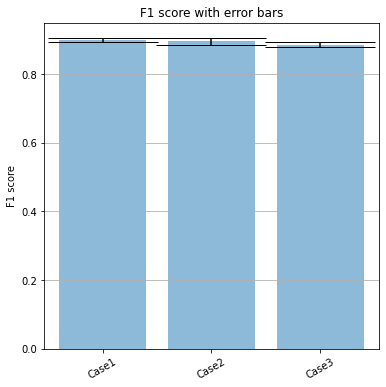

In [ ]:
labels= ['Case1', "Case2", 'Case3']
x_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=55)
ax.set_ylabel('F1 score')
ax.set_xticks(x_pos)
ax.set_xticklabels(ax.get_xticks(), rotation = 30)
ax.set_xticklabels(labels)
ax.set_title('F1 score with error bars')
ax.yaxis.grid(True)
plt.show()

#### Final model:

In [18]:
cols_drop= ['pos', 'neg', 'neutral', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

#scale only numerical columns:
num_feature= ['stars', 'review_count_16_19', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
#print(category_cols)


features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)


In [58]:
model, history, val_f1_list, test_f1= run_cross_validation_f1_score(scale_train, y_train, [], False, True, True, scale_test, y_test)

Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5


In [61]:
np.mean(val_f1_list), np.mean(test_f1)

(0.899778174236215, 0.8909975410731004)

In [49]:
# predict probabilities for test set
yhat_probs = model.predict(scale_test, verbose=0)
yhat_probs = yhat_probs[:, 0]

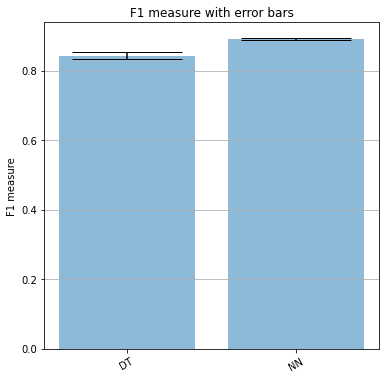

In [60]:
#dt f measure:
f1_dt= np.array([0.8425655976676385, 0.8622222222222222, 0.8357771260997067, 0.8330871491875922, 0.8410104011887073])
test_f1= np.array(test_f1)

CTEs = [f1_dt.mean(), test_f1.mean()]
error = [f1_dt.std(), test_f1.std()]

labels= ['DT', "NN"]
x_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=55)
ax.set_ylabel('F1 measure')
ax.set_xticks(x_pos)
ax.set_xticklabels(ax.get_xticks(), rotation = 30)
ax.set_xticklabels(labels)
ax.set_title('F1 measure with error bars')
ax.yaxis.grid(True)
plt.show()

In [52]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

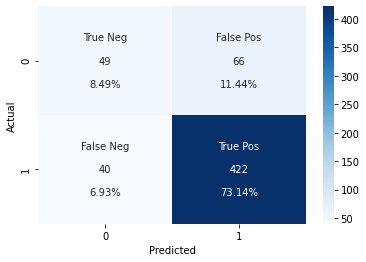

In [51]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [55]:
precision, recall, thresholds = precision_recall_curve(y_test, yhat_probs)

In [26]:
auc_score = auc(recall, precision)
print('NN: auc=%.3f' % (auc_score))

NN: auc=0.954


In [40]:
#decison tree:
pr_dt = [0.7551963,  0.76811594, 0.76941748, 0.77525253, 0.81534091, 0.81714286, 0.81791908, 0.81976744, 0.82215743, 0.82282282, 0.85140562, 0.85483871, 0.87234043, 0.87068966, 0.87428571, 0.89583333, 0.87234043, 1.]
rr_dt=   [1., 0.97247706, 0.96941896, 0.93883792, 0.87767584, 0.87461774, 0.86544343, 0.86238532, 0.86238532, 0.83792049, 0.64831804, 0.64831804, 0.62691131, 0.617737, 0.46788991, 0.39449541, 0.12538226, 0.]

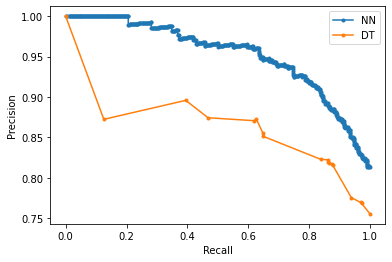

In [56]:
plt.plot(recall, precision, marker='.', label='NN')
plt.plot(rr_dt, pr_dt, marker='.', label='DT')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#### ANN

In [13]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    #print('Learning rate: ', lr)
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),cooldown=0, patience=5,min_lr=0.5e-6)
callbacks = [lr_scheduler, lr_reducer]

In [14]:
def model_train(X_train, Y_train, X_val, Y_val,epochs, neurons, batch, act_func, lrate=None):
    # define model
    ################################################################# Reproducibility #########################################################
    #tf.keras.backend.clear_session()
    #np.random.seed(42)
    #random.seed(12345)
    #session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    #tf.random.set_seed(1234)
    #sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    #tf.compat.v1.keras.backend.set_session(sess)
    #############################################################################################################################################
    #np.random.seed(0)
    #print(np.random.rand(4))
    initializer = tf.keras.initializers.GlorotNormal()
    opt= tf.keras.optimizers.Adam()
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=act_func, kernel_initializer=initializer))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    
    history= model.fit(X_train, Y_train, epochs=epochs, batch_size= batch, validation_data=(X_val, Y_val), shuffle= True, verbose=0, callbacks=callbacks)
    return model, history

#### Tuning NN:

In [ ]:
# define model

def create_model(X_train, Y_train, X_val, Y_val, batch, epoch, neurons, init_param, optname, act_func, decay_lr= True, dropout=False, drop_val= None):
    ################################################################# Reproducibility #########################################################
    tf.keras.backend.clear_session()
    np.random.seed(42)
    random.seed(12345)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    tf.random.set_seed(1234)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    #############################################################################################################################################
    np.random.seed(0)
    #print(np.random.rand(4))
    if init_param== 'HE':
        initializer= tf.keras.initializers.HeNormal(seed=42)
    elif init_param=='GN':
        initializer = tf.keras.initializers.GlorotNormal(seed=42)
    elif init_param=='GU':
        initializer = tf.keras.initializers.GlorotUniform(seed=42)
    elif init_param== 'RU':
        initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42)

    if optname== 'ADAM':
        opt= tf.keras.optimizers.Adam(learning_rate=lr_schedule(0))  
    elif optname== 'RMSProp':
        opt= tf.keras.optimizers.RMSprop(learning_rate=lr_schedule(0), momentum=0.9)
    elif optname== 'SGD':
        opt= tf.keras.optimizers.SGD(learning_rate=lr_schedule(0))

    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=act_func, kernel_initializer=initializer))
    if dropout:
        model.add(Dropout= drop_val)
    #model.add(Dense(50, input_dim=scale_x.shape[1], activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    
    history= model.fit(X_train, Y_train, epochs=epoch, batch_size= batch, validation_data=(X_val, Y_val),shuffle= True, verbose=0, callbacks=callbacks)
    
    return model,history

In [ ]:
epochs= [50, 100, 200]
neurons= [10, 20, 30, 40, 50]
batches= [16, 32, 64]
act_funcs= ['relu', 'tanh']
drop_out_list= [0.5, 0.6, 0.7, 0.8, 0.9]
optnames= ['SGD', 'RMSProp', 'ADAM']

In [ ]:
mean_f1_Scores={}
for opt in optnames:
    for e in epochs:
        for n in neurons:
            for batch in batches:
                for act in act_funcs:
                    print('Running for OPT= {}, Epochs= {}, Neurons= {}, batch= {}, ACT_F={}' .format(opt, e, n, batch, act))
                    str_name=str(opt)+'_'+str(e)+'_'+str(n)+'_'+str(batch)+'_'+str(act)
                    f1_scorelist= []
                    skf = StratifiedKFold(n_splits = 5, shuffle = True) 
                    for train_index, val_index in skf.split(scale_train, y_train):
                        X_train, X_val = scale_train[train_index], scale_train[val_index]
                        Y_train, Y_val = y_train[train_index], y_train[val_index]

                        model, history= create_model(X_train, Y_train, X_val, Y_val, batch, e, n, 'GN', opt, act)
                        yhat_probs = model.predict(X_val, verbose=0)
                        yhat_probs = yhat_probs[:, 0]
                        # predict crisp classes for test set
                        yhat_classes = 1*(yhat_probs > 0.5)       
                        # f1: 2 tp / (2 tp + fp + fn)
                        f1 = f1_score(Y_val, yhat_classes)

                        f1_scorelist.append(f1)

                    mean_f1_Scores[str_name]= np.round(np.mean(f1_scorelist), 3)      

In [ ]:
filenm= '/content/drive/MyDrive/datasets/f1_score.txt'
import json
with open(filenm, 'w') as convert_file:
     convert_file.write(json.dumps(mean_f1_Scores))